# **Importing Libraries**

In [ ]:
import pandas as pd

import numpy as np

import tensorflow as tf

import seaborn as sns



import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/UNSW_NB15_testing-set.csv
/kaggle/input/UNSW-NB15_1.csv
/kaggle/input/UNSW_NB15_training-set.csv
/kaggle/input/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/UNSW-NB15_4.csv
/kaggle/input/UNSW-NB15_3.csv
/kaggle/input/UNSW-NB15_2.csv
/kaggle/input/NUSW-NB15_features.csv


# **Loading Dataset**

In [ ]:
import pandas as pd



# Charger les ensembles de données depuis le dossier local 'dataset'

testing_set = pd.read_csv('/kaggle/input/UNSW_NB15_testing-set.csv')

training_set = pd.read_csv('/kaggle/input/UNSW_NB15_training-set.csv')

LIST_EVENTS = pd.read_csv('/kaggle/input/UNSW-NB15_LIST_EVENTS.csv')

NB15_1 = pd.read_csv('/kaggle/input/UNSW-NB15_1.csv')

NB15_2 = pd.read_csv('/kaggle/input/UNSW-NB15_2.csv')

NB15_3 = pd.read_csv('/kaggle/input/UNSW-NB15_3.csv')

NB15_4 = pd.read_csv('/kaggle/input/UNSW-NB15_4.csv')

NB15_features = pd.read_csv('/kaggle/input/NUSW-NB15_features.csv', encoding='cp1252')


/tmp/ipykernel_30/309897338.py:13: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_1 = pd.read_csv('/kaggle/input/UNSW-NB15_1.csv')
/tmp/ipykernel_30/309897338.py:15: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_2 = pd.read_csv('/kaggle/input/UNSW-NB15_2.csv')


In [ ]:
NB15_1.columns = NB15_features['Name']

NB15_2.columns = NB15_features['Name']

NB15_3.columns = NB15_features['Name']

NB15_4.columns = NB15_features['Name']

In [ ]:
training_set = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)

In [ ]:
# Shuffle the data points in train_df

training_set = training_set.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
combined_data=training_set

In [ ]:
combined_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,...,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,...,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,...,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,...,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,...,,2,2,5,4,1,1,1,NaN,0


# **Data Cleaning**

In [ ]:
combined_data['Label'].value_counts()

Label
0    2218760
1     321283
Name: count, dtype: int64

In [ ]:
combined_data['attack_cat'].isnull().sum()

2218760

In [ ]:
combined_data['attack_cat'] = combined_data['attack_cat'].fillna(value='normal').apply(lambda x: x.strip().lower())

In [ ]:
combined_data['attack_cat'].value_counts()

attack_cat
normal            2218760
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             1795
shellcode            1511
backdoors             534
worms                 174
Name: count, dtype: int64

In [ ]:
combined_data['attack_cat'] = combined_data['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

In [ ]:
combined_data['attack_cat'].value_counts()

attack_cat
normal            2218760
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             2329
shellcode            1511
worms                 174
Name: count, dtype: int64

In [ ]:
combined_data.isnull().sum()

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [ ]:
combined_data['ct_flw_http_mthd'] = combined_data['ct_flw_http_mthd'].fillna(value=0)

In [ ]:
combined_data['is_ftp_login'].value_counts()

is_ftp_login
0.0    1066591
1.0      43389
4.0        156
2.0         30
Name: count, dtype: int64

In [ ]:
combined_data['is_ftp_login'] = combined_data['is_ftp_login'].fillna(value=0)

In [ ]:
combined_data['is_ftp_login'].value_counts()

is_ftp_login
0.0    2496468
1.0      43389
4.0        156
2.0         30
Name: count, dtype: int64

In [ ]:
combined_data['is_ftp_login'] = np.where(combined_data['is_ftp_login']>1, 1, combined_data['is_ftp_login'])

In [ ]:
combined_data['is_ftp_login'].value_counts()

is_ftp_login
0.0    2496468
1.0      43575
Name: count, dtype: int64

In [ ]:
combined_data['service'].value_counts()

service
-           1246395
dns          781667
http         206273
ftp-data     125783
smtp          81644
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: count, dtype: int64

In [ ]:
#combined_data['service'] = combined_data['servie'].replace(to_replace='-', value='None')

combined_data['service'] = combined_data['service'].apply(lambda x:"None" if x=='-' else x)

In [ ]:
combined_data['service'].value_counts()

service
None        1246395
dns          781667
http         206273
ftp-data     125783
smtp          81644
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: count, dtype: int64

In [ ]:
combined_data['ct_ftp_cmd'].unique()

array([' ', 0, 1, '1', 2, '0', '4', 5, 3, 4, 6, 8, '2'], dtype=object)

In [ ]:
combined_data['ct_ftp_cmd'] = combined_data['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)

In [ ]:
combined_data['ct_ftp_cmd'].unique()

array([0, 1, 2, 4, 5, 3, 6, 8])

In [ ]:
combined_data[['service','ct_flw_http_mthd','is_ftp_login','ct_ftp_cmd','attack_cat','Label']]

Name,service,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,attack_cat,Label
0,None,0.0,0.0,0,normal,0
1,None,0.0,0.0,0,normal,0
2,None,0.0,0.0,0,normal,0
3,dns,0.0,0.0,0,generic,1
4,dns,0.0,0.0,0,normal,0
...,...,...,...,...,...,...
2540038,None,0.0,0.0,0,normal,0
2540039,dns,0.0,0.0,0,normal,0
2540040,None,0.0,0.0,0,normal,0
2540041,dns,0.0,0.0,0,generic,1


In [ ]:
combined_data['attack_cat'].nunique()

10

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [ ]:
combined_data.shape

(2540043, 49)

In [ ]:
combined_data.drop(columns=['srcip','sport','dstip','dsport','Label'],inplace=True)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 44 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            int64  
 4   dbytes            int64  
 5   sttl              int64  
 6   dttl              int64  
 7   sloss             int64  
 8   dloss             int64  
 9   service           object 
 10  Sload             float64
 11  Dload             float64
 12  Spkts             int64  
 13  Dpkts             int64  
 14  swin              int64  
 15  dwin              int64  
 16  stcpb             int64  
 17  dtcpb             int64  
 18  smeansz           int64  
 19  dmeansz           int64  
 20  trans_depth       int64  
 21  res_bdy_len       int64  
 22  Sjit              float64
 23  Djit              float64
 24  Stime             int64  
 25  Ltime             int64  
 26  Sintpkt       

In [ ]:
combined_data.shape

(2540043, 44)

In [ ]:
train, test = train_test_split(combined_data,test_size=0.2,random_state=16)

train, val = train_test_split(train,test_size=0.2,random_state=16)

In [ ]:
train.shape

(1625627, 44)

In [ ]:
test.shape

(508009, 44)

In [ ]:
x_train, y_train = train.drop(columns=['attack_cat']), train[['attack_cat']]

x_test, y_test = test.drop(columns=['attack_cat']), test[['attack_cat']]

x_val, y_val = val.drop(columns=['attack_cat']), val[['attack_cat']]

In [ ]:
x_train.shape, y_train.shape

((1625627, 43), (1625627, 1))

In [ ]:
x_test.shape, y_test.shape

((508009, 43), (508009, 1))

In [ ]:
x_val.shape, y_val.shape

((406407, 43), (406407, 1))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1625627 entries, 668560 to 1686015
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   proto             1625627 non-null  object 
 1   state             1625627 non-null  object 
 2   dur               1625627 non-null  float64
 3   sbytes            1625627 non-null  int64  
 4   dbytes            1625627 non-null  int64  
 5   sttl              1625627 non-null  int64  
 6   dttl              1625627 non-null  int64  
 7   sloss             1625627 non-null  int64  
 8   dloss             1625627 non-null  int64  
 9   service           1625627 non-null  object 
 10  Sload             1625627 non-null  float64
 11  Dload             1625627 non-null  float64
 12  Spkts             1625627 non-null  int64  
 13  Dpkts             1625627 non-null  int64  
 14  swin              1625627 non-null  int64  
 15  dwin              1625627 non-null  int64  
 16  

In [ ]:
cat_col = ['proto', 'service', 'state']

num_col = list(set(x_train.columns) - set(cat_col))

# **Data Correlation**

In [ ]:
# labels = train['Label']



# # Create a count plot with Seaborn

# sns.countplot(x=labels)



# # Add labels and title

# plt.xlabel('Class Label')

# plt.ylabel('Number of Data Points')

# plt.title('Class Distribution')



# # Rotate x-axis labels for better readability if there are many classes

# plt.xticks(rotation=0)



# # Show the plot

# plt.show()


In [ ]:
# combined_data.drop(columns=['attack_cat'],inplace=True)

In [ ]:
del combined_data

# **Data Preprocessing**

1.Data encoding : find the categorical features and use OneHotEncoder



2.Data Normalization : find numerical features and use StandaraScaler



3.Feature Selection : SelectKBest

In [ ]:
scaler = StandardScaler()

scaler = scaler.fit(x_train[num_col])

x_train[num_col] = scaler.transform(x_train[num_col])

x_test[num_col] = scaler.transform(x_test[num_col])

x_val[num_col] = scaler.transform(x_val[num_col])

In [ ]:
x_train.isnull().sum()

Name
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_dst_src_ltm      0
dtype: int64

In [ ]:
x_train.head()

Name,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
668560,udp,CON,-0.042152,-0.076738,-0.224285,-0.425641,-0.040753,-0.236284,-0.287323,None,...,-0.197719,-0.131672,-0.111036,-0.203678,-0.276173,-0.421367,-0.353420,-0.429432,-0.419821,-0.519213
1810690,tcp,FIN,-0.041193,-0.032713,-0.090640,-0.425641,-0.040753,0.084333,-0.041463,None,...,-0.197719,-0.131672,-0.111036,-0.572721,-0.645688,-0.176521,-0.597013,-0.429432,-0.419821,-0.519213
1888748,tcp,FIN,-0.041183,-0.032713,-0.090344,-0.425641,-0.040753,0.084333,-0.041463,None,...,-0.197719,-0.131672,-0.111036,-0.111417,0.093342,0.068324,-0.231624,-0.429432,-0.419821,-0.519213
2146191,udp,CON,-0.042155,-0.076738,-0.224285,-0.425641,-0.040753,-0.236284,-0.287323,dns,...,-0.197719,-0.131672,-0.111036,-0.572721,-0.460931,-0.421367,-0.353420,-0.429432,-0.419821,-0.430408
1180304,udp,INT,-0.042220,-0.077326,-0.225384,2.564163,-0.718646,-0.236284,-0.287323,dns,...,-0.197719,-0.131672,-0.111036,2.287361,2.310433,1.659823,1.595323,1.810081,1.360736,2.411326


In [ ]:
x_test.head()

Name,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
76611,udp,CON,-0.042151,-0.076738,-0.224285,-0.425641,-0.040753,-0.236284,-0.287323,dns,...,-0.197719,-0.131672,-0.111036,-0.388199,-0.460931,-0.421367,-0.109827,-0.429432,-0.419821,-0.430408
1677804,tcp,FIN,-0.040937,0.605726,-0.205167,-0.425641,-0.040753,0.588160,-0.146831,smtp,...,-0.197719,-0.131672,-0.111036,-0.757242,-0.738067,-0.666213,-0.718810,-0.429432,-0.419821,-0.519213
1094113,tcp,FIN,0.023240,-0.050389,-0.162634,-0.425641,-0.040753,-0.098877,-0.199516,http,...,1.588390,-0.131672,-0.111036,-0.757242,-0.553310,-0.298944,-0.109827,-0.429432,-0.419821,-0.341604
326349,tcp,FIN,-0.041921,-0.002101,-0.210227,-0.425641,-0.040753,0.084333,-0.164393,None,...,-0.197719,-0.131672,-0.111036,-0.203678,-0.368552,-0.298944,-0.475217,-0.429432,-0.419821,-0.163996
2129556,udp,CON,-0.042152,-0.077032,-0.224384,-0.425641,-0.040753,-0.236284,-0.287323,dns,...,-0.197719,-0.131672,-0.111036,-0.480460,-0.553310,-0.421367,-0.353420,-0.429432,-0.419821,-0.341604


In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
x_train.shape

(1625627, 43)

In [ ]:
x_test.shape

(508009, 43)

In [ ]:
x_val.shape

(406407, 43)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer



# Define your ColumnTransformer

ct = ColumnTransformer(

    transformers=[('encoder', OneHotEncoder(sparse_output=False), cat_col)],

    remainder='passthrough'

)



# Transform the datasets

x_train = np.array(ct.fit_transform(x_train))

x_test = np.array(ct.transform(x_test))

x_val = np.array(ct.transform(x_val))


In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1625627 entries, 668560 to 1686015
Data columns (total 1 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   attack_cat  1625627 non-null  object
dtypes: object(1)
memory usage: 24.8+ MB


In [ ]:
y_train.columns

Index(['attack_cat'], dtype='object', name='Name')

In [ ]:
attacks = y_train['attack_cat'].unique()

In [ ]:
attacks

array(['normal', 'generic', 'exploits', 'backdoor', 'analysis', 'dos',
       'reconnaissance', 'fuzzers', 'shellcode', 'worms'], dtype=object)

In [ ]:
# Get unique elements and their counts

unique_values, counts = np.unique(y_train, return_counts=True)



# Print the unique values and their corresponding counts

for value, count in zip(unique_values, counts):

    print(f"Value: {value}, Count: {count}")

Value: analysis, Count: 1728
Value: backdoor, Count: 1441
Value: dos, Count: 10499
Value: exploits, Count: 28367
Value: fuzzers, Count: 15455
Value: generic, Count: 137810
Value: normal, Count: 1420330
Value: reconnaissance, Count: 8909
Value: shellcode, Count: 980
Value: worms, Count: 108


In [ ]:
# Get unique elements and their counts

unique_values, counts = np.unique(y_test, return_counts=True)



# Print the unique values and their corresponding counts

for value, count in zip(unique_values, counts):

    print(f"Value: {value}, Count: {count}")

Value: analysis, Count: 524
Value: backdoor, Count: 496
Value: dos, Count: 3225
Value: exploits, Count: 9003
Value: fuzzers, Count: 4898
Value: generic, Count: 43092
Value: normal, Count: 443659
Value: reconnaissance, Count: 2780
Value: shellcode, Count: 288
Value: worms, Count: 44


In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

import numpy as np



ct1 = ColumnTransformer(

    transformers=[('encoder', OneHotEncoder(categories=[attacks], sparse_output=False), ['attack_cat'])],

    remainder='passthrough'

)



y_train = np.array(ct1.fit_transform(y_train))

y_test = np.array(ct1.transform(y_test))

y_val = np.array(ct1.transform(y_val))


In [ ]:
print(x_train)

[[ 0.          0.          0.         ... -0.42943209 -0.41982139
  -0.5192126 ]
 [ 0.          0.          0.         ... -0.42943209 -0.41982139
  -0.5192126 ]
 [ 0.          0.          0.         ... -0.42943209 -0.41982139
  -0.5192126 ]
 ...
 [ 0.          0.          0.         ... -0.42943209 -0.41982139
  -0.16399583]
 [ 0.          0.          0.         ... -0.42943209 -0.41982139
  -0.5192126 ]
 [ 0.          0.          0.         ...  0.39565179  0.71326043
   0.8128503 ]]


In [ ]:
print(x_test)

[[ 0.          0.          0.         ... -0.42943209 -0.41982139
  -0.43040841]
 [ 0.          0.          0.         ... -0.42943209 -0.41982139
  -0.5192126 ]
 [ 0.          0.          0.         ... -0.42943209 -0.41982139
  -0.34160422]
 ...
 [ 0.          0.          0.         ... -0.42943209 -0.41982139
  -0.5192126 ]
 [ 0.          0.          0.         ... -0.42943209 -0.41982139
  -0.34160422]
 [ 0.          0.          0.         ...  1.33860479  2.00821109
   0.8128503 ]]


In [ ]:
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
y_train.shape

(1625627, 10)

In [ ]:
x_train.shape

(1625627, 204)

In [ ]:
x_test.shape

(508009, 204)

In [ ]:
x_train.reshape(-1,1).shape

(331627908, 1)

In [ ]:
x_train.shape

(1625627, 204)

In [ ]:
x_val.shape

(406407, 204)

# **Training Model**

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, LSTM, Dense, Dropout

In [ ]:
# Define model parameters

n_features = x_train.shape[1]  # Number of features from training data



# Define the model

model = Sequential()



# First convolutional block

model.add(Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(n_features,1)))

model.add(MaxPooling1D(pool_size=2))

model.add(BatchNormalization())



# First LSTM block

model.add(LSTM(units=16, return_sequences=True))

#model.add(Dropout(0.2))  # Added dropout after LSTM



# Second convolutional block

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

model.add(MaxPooling1D(pool_size=2))

model.add(BatchNormalization())



# Second LSTM block

model.add(LSTM(units=32, return_sequences=True))

#model.add(Dropout(0.2))  # Added dropout after LSTM



# Third convolutional block

model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

model.add(MaxPooling1D(pool_size=2))

model.add(BatchNormalization())



# Third LSTM block

model.add(LSTM(units=64))

#model.add(Dropout(0.2))  # Added dropout after LSTM



# Dense layers

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.2))  # Adjusted dropout rate for dense layer



model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes



# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])



model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 204, 16)        │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 102, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 102, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 102, 16)        │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 46, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,618 (236.79 KB)

 Trainable params: 60,394 (235.91 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
def create_model():

    n_features = x_train.shape[1]  # Number of features from training data



    # Define the model

    model = Sequential()



    # First convolutional block

    model.add(Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(n_features,1)))

    model.add(MaxPooling1D(pool_size=2))

    model.add(BatchNormalization())



    # First LSTM block

    model.add(LSTM(units=16, return_sequences=True))

    #model.add(Dropout(0.2))  # Added dropout after LSTM



    # Second convolutional block

    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

    model.add(MaxPooling1D(pool_size=2))

    model.add(BatchNormalization())



    # Second LSTM block

    model.add(LSTM(units=32, return_sequences=True))

    #model.add(Dropout(0.2))  # Added dropout after LSTM



    # Third convolutional block

    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

    model.add(MaxPooling1D(pool_size=2))

    model.add(BatchNormalization())



    # Third LSTM block

    model.add(LSTM(units=64))

    #model.add(Dropout(0.2))  # Added dropout after LSTM



    # Dense layers

    model.add(Dense(64, activation='relu'))

    model.add(Dropout(0.2))  # Adjusted dropout rate for dense layer



    model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes



    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])



    return model


In [ ]:
x_train.shape

(1625627, 204)

# **Training the model**

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=256,validation_data=(x_val,y_val))



 #Evaluate the model

test_loss, test_accuracy, test_precision, test_recall = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)

print("Test Accuracy:", test_accuracy)

print("Test Precision:", test_precision)

print("Test Recall:", test_recall)

Epoch 1/5
6351/6351 ━━━━━━━━━━━━━━━━━━━━ 109s 16ms/step - accuracy: 0.9644 - loss: 0.1081 - precision: 0.9874 - recall: 0.9450 - val_accuracy: 0.9753 - val_loss: 0.0616 - val_precision: 0.9908 - val_recall: 0.9645
Epoch 2/5
6351/6351 ━━━━━━━━━━━━━━━━━━━━ 100s 16ms/step - accuracy: 0.9754 - loss: 0.0617 - precision: 0.9896 - recall: 0.9655 - val_accuracy: 0.9699 - val_loss: 0.1470 - val_precision: 0.9810 - val_recall: 0.9614
Epoch 3/5
6351/6351 ━━━━━━━━━━━━━━━━━━━━ 100s 16ms/step - accuracy: 0.9769 - loss: 0.0584 - precision: 0.9900 - recall: 0.9678 - val_accuracy: 0.9775 - val_loss: 0.0570 - val_precision: 0.9911 - val_recall: 0.9677
Epoch 4/5
6351/6351 ━━━━━━━━━━━━━━━━━━━━ 99s 16ms/step - accuracy: 0.9778 - loss: 0.0552 - precision: 0.9904 - recall: 0.9690 - val_accuracy: 0.9781 - val_loss: 0.0544 - val_precision: 0.9899 - val_recall: 0.9700
Epoch 5/5
6351/6351 ━━━━━━━━━━━━━━━━━━━━ 99s 16ms/step - accuracy: 0.9780 - loss: 0.0548 - precision: 0.9904 - recall: 0.9693 - val_accuracy: 0.9

# **Testing the model with test set**

In [ ]:
y_pred = model.predict(x_test)  # Assuming X_test is your test data

15876/15876 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step


In [ ]:
y_pred

array([[1.0000000e+00, 1.6240072e-13, 6.4947631e-12, ..., 4.7885490e-14,
        2.3889403e-37, 0.0000000e+00],
       [1.0000000e+00, 6.0740909e-13, 5.0590164e-11, ..., 1.5381555e-15,
        0.0000000e+00, 7.6744661e-38],
       [9.9999976e-01, 3.0969325e-09, 1.9388520e-07, ..., 2.4268536e-09,
        2.7695866e-25, 1.5498091e-25],
       ...,
       [1.0000000e+00, 7.2482883e-13, 4.9333645e-12, ..., 1.0206268e-14,
        2.9828639e-38, 9.4822706e-38],
       [1.0000000e+00, 1.9341879e-14, 2.8926330e-13, ..., 6.1530003e-16,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 7.4126131e-12, 6.3160410e-10, ..., 3.1730177e-13,
        8.8225654e-34, 4.9177334e-34]], dtype=float32)

**Neural netwrok**

In [ ]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [ ]:
y_train_labels = np.argmax(y_train, axis=1)

In [ ]:
y_train_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
scores = []

model = create_model()

for train_index, val_index in kfold.split(x_train, y_train_labels):

    X_train_inner, X_val_inner = x_train[train_index], x_train[val_index]

    y_train_inner, y_val_inner = y_train[train_index], y_train[val_index]



    model.fit(X_train_inner, y_train_inner, epochs=5, batch_size=256,validation_data=(X_val_inner, y_val_inner))

    test_loss, test_acc, precision, recall = model.evaluate(x_val, y_val)

    scores.append([test_loss, test_acc, precision, recall])



print("Average K-Fold Cross-Validation Results (on Validation Set):")

print("Loss:", np.mean([score[0] for score in scores]))

print("Accuracy:", np.mean([score[1] for score in scores]))

print("Precision:", np.mean([score[2] for score in scores]))

print("Recall:", np.mean([score[3] for score in scores]))

Epoch 1/5
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 68s 20ms/step - accuracy: 0.9618 - loss: 0.1236 - precision_1: 0.9863 - recall_1: 0.9389 - val_accuracy: 0.9722 - val_loss: 0.0730 - val_precision_1: 0.9879 - val_recall_1: 0.9627
Epoch 2/5
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 61s 19ms/step - accuracy: 0.9740 - loss: 0.0664 - precision_1: 0.9894 - recall_1: 0.9630 - val_accuracy: 0.9757 - val_loss: 0.0619 - val_precision_1: 0.9902 - val_recall_1: 0.9652
Epoch 3/5
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 61s 19ms/step - accuracy: 0.9757 - loss: 0.0620 - precision_1: 0.9896 - recall_1: 0.9658 - val_accuracy: 0.9769 - val_loss: 0.0591 - val_precision_1: 0.9896 - val_recall_1: 0.9681
Epoch 4/5
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 61s 19ms/step - accuracy: 0.9769 - loss: 0.0586 - precision_1: 0.9901 - recall_1: 0.9676 - val_accuracy: 0.9775 - val_loss: 0.0568 - val_precision_1: 0.9904 - val_recall_1: 0.9682
Epoch 5/5
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 61s 19ms/step - accuracy: 0.9773 - loss: 0.0573 - precision_1: 0.9903 - rec

In [ ]:
y_pred = model.predict(x_test)  # Assuming X_test is your test data

15876/15876 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix



# Assuming y_test is your one-hot encoded ground truth (shape: n_samples x 10)

# Assuming y_pred is your predicted probabilities (shape: n_samples x 10)



# Get the predicted class index (one label per sample) for each sample

y_pred_labels = np.argmax(y_pred, axis=1)  # Argmax along axis=1 gives the index of the maximum value in each row



# Now you can use the confusion matrix with y_test and y_pred_labels

cm = confusion_matrix(y_test.argmax(axis=1), y_pred_labels)  # Convert y_test to labels using argmax

print(cm)




[[443002     11    127      0      0      2     72    426     19      0]
 [    73  42133    783      0      0     32     12     39     20      0]
 [   374     77   7915      0      0     72    222    277     66      0]
 [    23      5    345      0      0     10      4    101      8      0]
 [   102     11    310      0      0      2      0     99      0      0]
 [   100     61   2817      0      0     75     20    124     28      0]
 [   163      1    596      0      0     12   1991      9      8      0]
 [  2804     26    433      0      0      2     39   1582     12      0]
 [    67      8     12      0      0      0     46      5    150      0]
 [     3      0     37      0      0      0      2      0      2      0]]


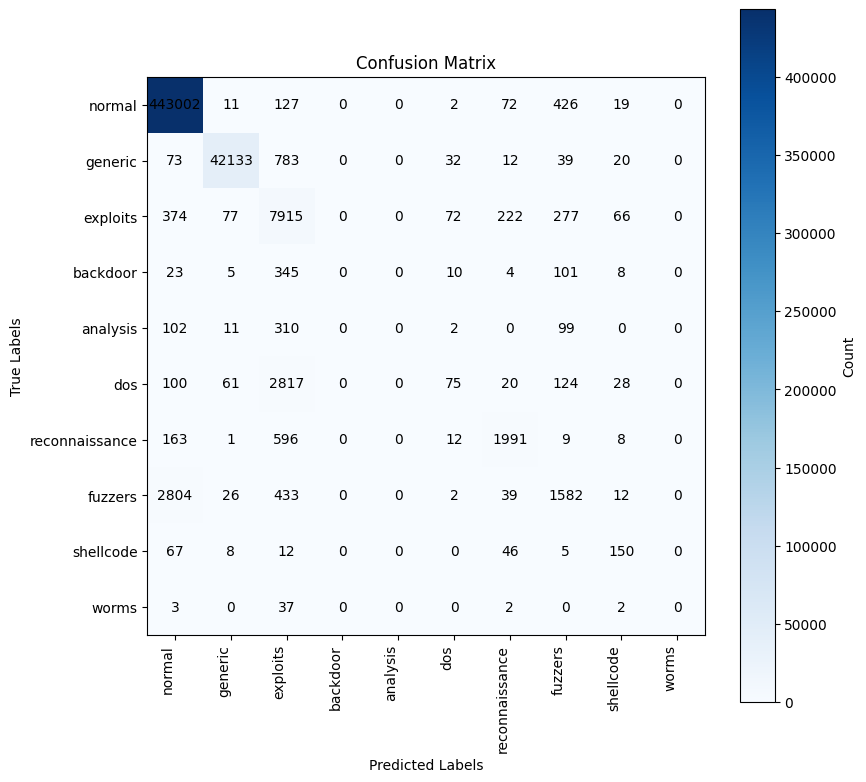

In [ ]:
import matplotlib.pyplot as plt



# Define labels for your classes (assuming you know the class names)

class_names = attacks



# Create a heatmap from the confusion matrix

plt.figure(figsize=(9, 9))

plt.imshow(cm, interpolation='nearest', cmap='Blues')

plt.colorbar(label='Count')

for i in range(len(class_names)):

    for j in range(len(class_names)):

        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=10)

plt.xticks(range(len(class_names)), class_names, rotation=90, ha='right')

plt.yticks(range(len(class_names)), class_names)

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.title('Confusion Matrix')

plt.grid(False)

plt.show()


# **Partie Federated learning**

In [ ]:
# Diviser les données d'entraînement en plusieurs clients

num_clients = 5  # Le nombre de clients

client_data = np.array_split(x_train, num_clients)  # Diviser x_train en num_clients sous-ensembles

client_labels = np.array_split(y_train, num_clients)  # Idem pour les labels


In [ ]:
def create_model():

    model = Sequential()

    model.add(Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(x_train.shape[1], 1)))

    model.add(MaxPooling1D(pool_size=2))

    model.add(BatchNormalization())

    model.add(LSTM(units=16, return_sequences=True))

    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

    model.add(MaxPooling1D(pool_size=2))

    model.add(BatchNormalization())

    model.add(LSTM(units=32, return_sequences=True))

    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

    model.add(MaxPooling1D(pool_size=2))

    model.add(BatchNormalization())

    model.add(LSTM(units=64))

    model.add(Dense(64, activation='relu'))

    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))  # Output layer

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
def train_client_model(client_data, client_labels, model, epochs=5, batch_size=256):

    model.fit(client_data, client_labels, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

    return model.get_weights()  # Renvoie les poids du modèle entraîné localement


In [ ]:
def aggregate_weights(client_weights):

    # Calcule la moyenne des poids de tous les clients

    avg_weights = [np.mean([client_weights[i][layer] for i in range(len(client_weights))], axis=0) for layer in range(len(client_weights[0]))]

    return avg_weights


In [ ]:
def update_global_model(global_model, aggregated_weights):

    global_model.set_weights(aggregated_weights)


In [ ]:
# Initialiser le modèle global

global_model = create_model()



num_rounds = 10  # Nombre de rounds d'entraînement fédéré

client_weights_per_round = []



for round_num in range(num_rounds):

    print(f"Round {round_num + 1}/{num_rounds}")



    # Entraîner les clients localement et collecter leurs poids

    client_weights = []

    for i in range(num_clients):

        client_model = create_model()  # Chaque client a son propre modèle

        client_model.set_weights(global_model.get_weights())  # Initialiser avec les poids du modèle global

        weights = train_client_model(client_data[i], client_labels[i], client_model)  # Entraîner et obtenir les poids

        client_weights.append(weights)



    # Agréger les poids des clients

    aggregated_weights = aggregate_weights(client_weights)



    # Mettre à jour le modèle global

    update_global_model(global_model, aggregated_weights)



    # Évaluer le modèle global après chaque round

    test_loss, test_accuracy = global_model.evaluate(x_test, y_test)

    print(f"Round {round_num + 1} - Test Accuracy: {test_accuracy:.4f}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Round 1/10
Epoch 1/5
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9520 - loss: 0.1690 - val_accuracy: 0.9541 - val_loss: 0.1711
Epoch 2/5
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9726 - loss: 0.0697 - val_accuracy: 0.9703 - val_loss: 0.0806
Epoch 3/5
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9743 - loss: 0.0654 - val_accuracy: 0.9695 - val_loss: 0.0827
Epoch 4/5
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9756 - loss: 0.0623 - val_accuracy: 0.9755 - val_loss: 0.0622
Epoch 5/5
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9759 - loss: 0.0614 - val_accuracy: 0.9752 - val_loss: 0.0692
Epoch 1/5
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9513 - loss: 0.1734 - val_accuracy: 0.9673 - val_loss: 0.0823
Epoch 2/5
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9717 - loss: 0.0741 - val_accuracy: 0.8851 - val_loss: 0.3182
Epoch 3/5
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.973

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.metrics import Precision, Recall

# Supposons que vous avez déjà défini votre fonction 'create_model'
# et que vous avez les données x_test et y_test

# Compilation du modèle global avec des métriques supplémentaires
global_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy', Precision(), Recall()])

# Après l'entraînement fédéré, évaluer le modèle global
test_loss, test_accuracy, test_precision, test_recall = global_model.evaluate(x_test, y_test)

# Affichage des résultats
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

# Matrice de confusion
y_pred = global_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_labels)

print("Confusion Matrix:\n", cm)


15876/15876 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.9796 - loss: 0.0509 - precision_2: 0.9906 - recall_2: 0.9718
Test Loss: 0.05055902898311615
Test Accuracy: 0.9797424674034119
Test Precision: 0.9906100630760193
Test Recall: 0.9718863368034363
15876/15876 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step
Confusion Matrix:
 [[442486      9    113      1      1     10     52    959     28      0]
 [    47  42328    626      1      3     25      5     36     21      0]
 [   288    113   8101      2      0     65    223    154     57      0]
 [     6      4    397     28      0      9      5     41      6      0]
 [    97      4    375      0     10      1      0     37      0      0]
 [    78     67   2856      5      0    114     16     60     29      0]
 [    22      6    573      0      0      5   2164      6      4      0]
 [  1971      7    563      0      0      2     36   2288     31      0]
 [    32      8     20      0      0      0     17     12    199      0]
 [     3      0     36   